In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [3]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]


In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
Xlog = train_data
ylog = train_labels

In [6]:
Xlog.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [7]:
ylog.value_counts()

Attrition
0            1595
1            1402
Name: count, dtype: int64

In [8]:
# Dzielimy zbiór X na treningowy i testowy:

Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(Xlog, ylog, stratify=ylog)

In [9]:
# Trenujemy model na danych treningowych:
from sklearn.datasets import make_classification

model = LogisticRegression(random_state=30, max_iter=1000)

# Parametr 'random_state' służy do ustawienia ziarna losowego dla algorytmu optymalizacji. Ustawienie go na stałą liczbę
# zapewnia, że model będzie dawał takie same wyniki przy każdym uruchomieniu (bez tego model będzie używał różnych ziaren 
# losowych za każdym razem, co może prowadzić do różnych wyników).

model.fit(Xlog_train, ylog_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=30)

In [10]:
y_pred_train = model.predict(Xlog_train)
y_pred = model.predict(Xlog_test)
print(y_pred)
print(ylog_test.values)

[1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 

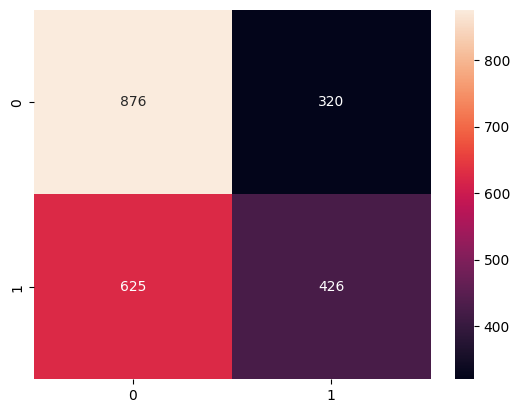

In [11]:
#  Metryki klasyfikacji:

from sklearn.metrics import confusion_matrix

cmlog_train = confusion_matrix(ylog_train, y_pred_train)
sns.heatmap(cmlog_train, annot=True, fmt='d')
plt.show()


In [12]:
cmlog_train

array([[876, 320],
       [625, 426]], dtype=int64)

<Axes: >

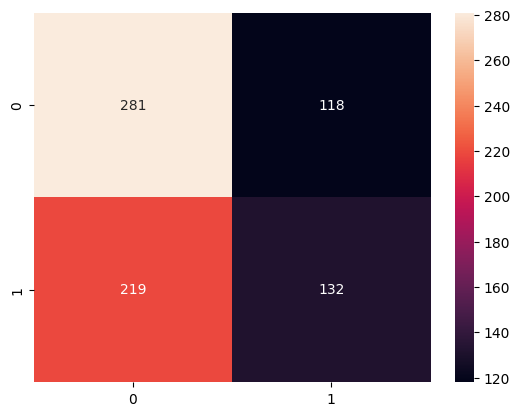

In [13]:
cmlog = confusion_matrix(ylog_test, y_pred)
sns.heatmap(cmlog, annot=True, fmt='d')

In [14]:
cmlog

array([[281, 118],
       [219, 132]], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [25]:
LogMetrics1 = calculate_metrics(ylog_test.values, y_pred)
LogMetrics = print_results(calculate_metrics(ylog_test.values, y_pred), 'Log')
LogMetrics

Results for Log
----
  Accuracy:  0.5506666666666666
  Precision: 0.545
  Recall:    0.5401645138487243
  F1 score:  0.5322034651183881
  Mislabeled 275250 out of 750




In [ ]:
# Wartości dla zbioru treningowego są nieco wyższe niż testowego.

In [29]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [31]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [32]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [33]:
XBay = train_data
yBay = train_labels

In [34]:
XBay_train, XBay_test, yBay_train, yBay_test = train_test_split(XBay, yBay, test_size=0.2, stratify=yBay)

In [35]:
# Klasyfikator Gaussowski lepiej nadaje się do danych ciągłych 
# (dane, które mogą przyjmować dowolną wartość z pewnego przedziału)

gnb = GaussianNB()  
gnb.fit(XBay_train, yBay_train)
y_gnb = gnb.predict(XBay_test)
print(yBay_test.values)
print(y_gnb)
print(confusion_matrix(yBay_test,y_gnb))

[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]


C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
GNBMetricsBayes1 = calculate_metrics(yBay_test.values, y_gnb)
GNBMetricsBayes = print_results(calculate_metrics(yBay_test.values, y_gnb), 'GNB')
GNBMetricsBayes

Results for GNB
----
  Accuracy:  0.5533333333333333
  Precision: 0.5484994862467669
  Recall:    0.5458115329265164
  F1 score:  0.5425788539438351
  Mislabeled 177226 out of 600




In [37]:
cm_gnbBay = confusion_matrix(yBay_test, y_gnb)
print(cm_gnbBay)

[[212 107]
 [161 120]]


<Axes: >

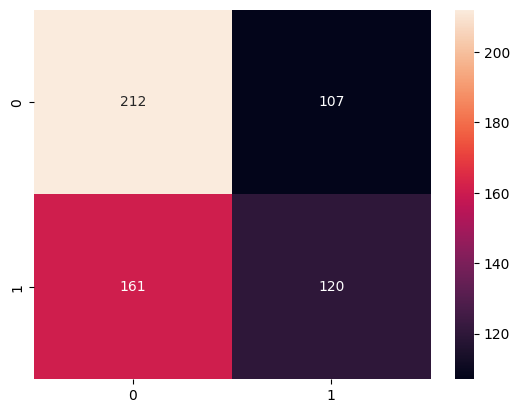

In [38]:
cm_gnbBay = confusion_matrix(yBay_test, y_gnb)
sns.heatmap(cm_gnbBay, annot=True, fmt='d')

In [ ]:
# Sprawdźmy jak poradzi sobie nasz model po dyskretyzacji danych (przekształcenie zmiennej ciągłej na dyskretną - taka, która
# przyjmuje wartości ze skończonego zbioru wartości):

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(XBay)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([19. , 23.1, 27.2, 31.3, 35.4, 39.5, 43.6, 47.7, 51.8, 55.9, 60. ])
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ])
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.])
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ])
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ])
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ])
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ])
 array

In [40]:
X_binned = kb.transform(XBay)
X_binned

<2997x460 sparse matrix of type '<class 'numpy.float64'>'
	with 137862 stored elements in Compressed Sparse Row format>

In [41]:
print(XBay[:10])
X_binned.toarray()[:10]

   Age  DistanceFromHome  Education  EnvironmentSatisfaction  JobInvolvement   
0   30                 1          1                        4               2  \
1   38                 2          2                        4               2   
2   26                 6          3                        3               2   
3   28                 8          2                        4               3   
4   35                 4          2                        3               3   
5   34                 9          4                        1               3   
6   32                 3          2                        3               3   
7   42                 2          3                        4               2   
8   34                 6          2                        4               1   
9   40                 4          1                        4               3   

   JobLevel  JobSatisfaction  MonthlyIncome  NumCompaniesWorked   
0         2                4           5126         

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
X_binned_train, X_binned_test, yBay_train, yBay_test = train_test_split(X_binned, yBay, test_size=0.2, stratify=yBay)

In [43]:
# Mamy dane dyskretne, więc lepiej sprawdzi się tu Klasyfikator Multinomialny:

mnb = MultinomialNB()

mnb.fit(X_binned_train, yBay_train)
y_mnb = mnb.predict(X_binned_test)
print(yBay_test.values)
print(y_mnb)
print(confusion_matrix(yBay_test,y_mnb))


[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]


C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
MNBMetricsBayes1 = calculate_metrics(yBay_test.values, y_mnb)
MNBMetricsBayes = print_results(calculate_metrics(yBay_test.values, y_mnb), 'MNB')
MNBMetricsBayes

Results for MNB
----
  Accuracy:  0.5616666666666666
  Precision: 0.5573446595049927
  Recall:    0.5540724461450931
  F1 score:  0.550876473953397
  Mislabeled 177188 out of 600




In [ ]:
# Wynik F1-Score dla 'MNB' lepszy niż dla 'GNB'.

In [45]:
cm_mnbBay = confusion_matrix(yBay_test, y_mnb)
print(cm_mnbBay)

[[215 104]
 [159 122]]


<Axes: >

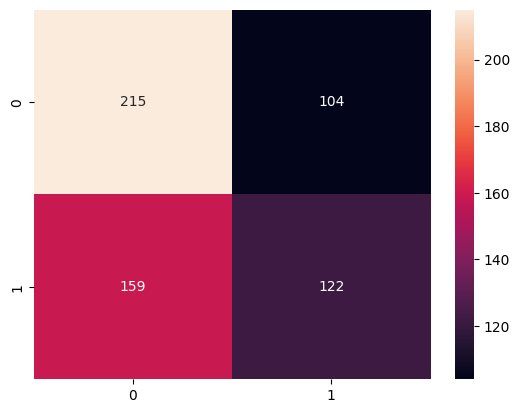

In [46]:
cm_mnbBay = confusion_matrix(yBay_test, y_mnb)
sns.heatmap(cm_mnbBay, annot=True, fmt='d')

In [47]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [49]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

XkNN = train_data
ykNN = train_labels

In [ ]:
# W przypadku KNN dobrą praktyką jest standaryzacja danych:

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XkNN = scaler.fit_transform(XkNN)

print(XkNN)

[[-0.78272417 -1.00899073 -1.86321492 ... -0.66972073 -1.61044254
   1.61044254]
 [ 0.10103353 -0.88497215 -0.89106048 ... -0.66972073 -1.61044254
   1.61044254]
 [-1.22460301 -0.38889779  0.08109396 ... -0.66972073  0.62094733
  -0.62094733]
 ...
 [-0.23037561 -0.14086062  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]]


In [51]:
XkNN_train, XkNN_test, ykNN_train, ykNN_test = train_test_split(XkNN, ykNN, test_size=0.2, stratify=ykNN)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(XkNN_train, ykNN_train.values.ravel())

pred_knn = knn.predict(XkNN_test)

In [53]:
pred_knn

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [54]:
len(ykNN_test)

600

In [55]:
type(ykNN_test)

pandas.core.frame.DataFrame

In [56]:
len(pred_knn)

600

In [57]:
type(pred_knn)

numpy.ndarray

In [58]:
ykNN_test = ykNN_test.to_numpy()

In [59]:
type(ykNN_test)

numpy.ndarray

In [60]:
KNNMetrics1 = calculate_metrics(ykNN_test, pred_knn)
KNNMetrics = print_results(calculate_metrics(ykNN_test, pred_knn), 'kNN')
KNNMetrics

Results for kNN
----
  Accuracy:  0.515
  Precision: 0.5135517348893145
  Recall:    0.5135766797933935
  F1 score:  0.5135284234810301
  Mislabeled 179468 out of 600




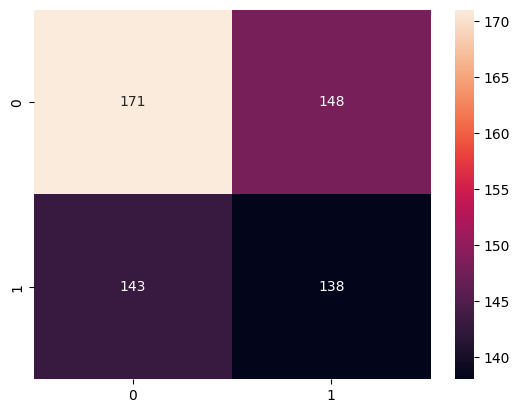

In [61]:
cmkNN_train = confusion_matrix(ykNN_test, pred_knn)
sns.heatmap(cmkNN_train, annot=True, fmt='d')
plt.show()

In [62]:
cmkNN_train

array([[171, 148],
       [143, 138]], dtype=int64)

<Axes: >

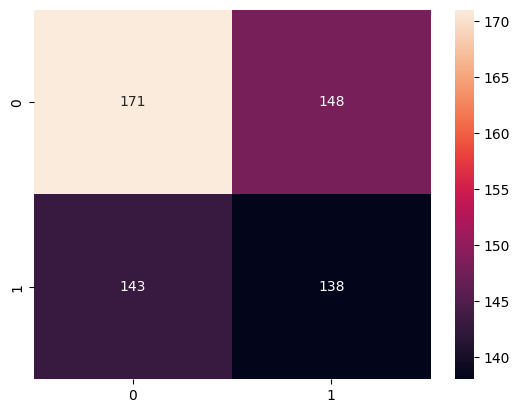

In [63]:
cmkNN = confusion_matrix(ykNN_test, pred_knn)
sns.heatmap(cmkNN, annot=True, fmt='d')

In [64]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [66]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [67]:
from sklearn import svm

X = train_data
y = train_labels

Xsvm = X
ysvm = y

In [68]:
# Również dla SVM wykonujemy standaryzację:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xsvm = scaler.fit_transform(Xsvm)

print(Xsvm)

[[-0.78272417 -1.00899073 -1.86321492 ... -0.66972073 -1.61044254
   1.61044254]
 [ 0.10103353 -0.88497215 -0.89106048 ... -0.66972073 -1.61044254
   1.61044254]
 [-1.22460301 -0.38889779  0.08109396 ... -0.66972073  0.62094733
  -0.62094733]
 ...
 [-0.23037561 -0.14086062  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]
 [ 0.43244266  2.33951114  1.05324841 ... -0.66972073  0.62094733
  -0.62094733]]


In [69]:
Xsvm_train, Xsvm_test, ysvm_train, ysvm_test = train_test_split(Xsvm, ysvm, test_size=0.2, stratify=ysvm)

In [70]:
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


clf = SVC(kernel='linear')

clf.fit(Xsvm_train, ysvm_train.values.ravel())

ysvm_pred = clf.predict(Xsvm_test)

accuracy = accuracy_score(ysvm_test, ysvm_pred)

print(f"Dokładność klasyfikacji: {accuracy}")


Dokładność klasyfikacji: 0.5716666666666667


In [9]:
def calculate_metricsSVM(target, prediction, average='macro'):
    accuracy = accuracy_score(target.ravel(), prediction.ravel())
    precision = precision_score(target.ravel(), prediction.ravel(), average=average)
    recall = recall_score(target.ravel(), prediction.ravel(), average=average)
    f1 = f1_score(target.ravel(), prediction.ravel(), average=average)
    mislabeled = (target.ravel() != prediction.ravel()).sum()
    total = len(target.ravel())
    return accuracy, precision, recall, f1, mislabeled, total
def print_resultsSVM(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [72]:
SVMMetrics1 = calculate_metricsSVM(ysvm_test.values, ysvm_pred)
SVMMetrics = print_resultsSVM(calculate_metricsSVM(ysvm_test.values, ysvm_pred), 'svm')
SVMMetrics

Results for svm
----
  Accuracy:  0.5716666666666667
  Precision: 0.5765527950310559
  Recall:    0.5549983824005177
  F1 score:  0.5298192761900116
  Mislabeled 257 out of 600




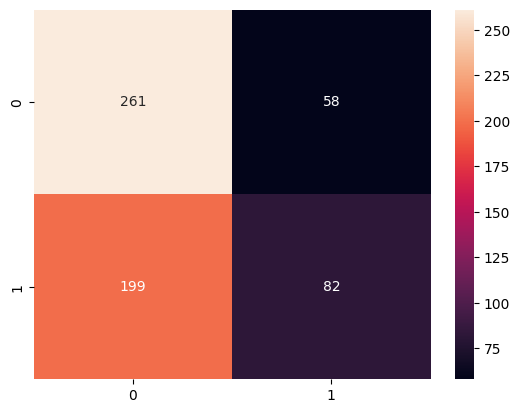

In [73]:
cmsvm_train = confusion_matrix(ysvm_test, ysvm_pred)
sns.heatmap(cmsvm_train, annot=True, fmt='d')
plt.show()

<Axes: >

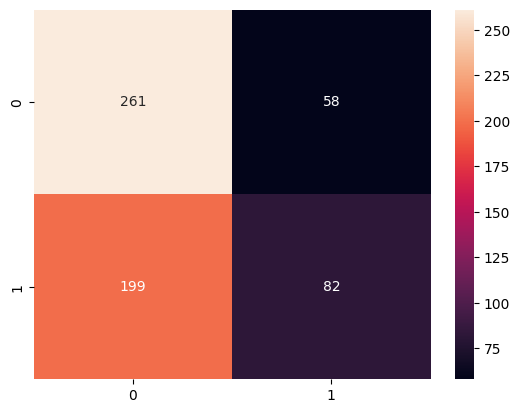

In [74]:
cmsvm = confusion_matrix(ysvm_test, ysvm_pred)
sns.heatmap(cmsvm, annot=True, fmt='d')

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [3]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [4]:
XDD = train_data
yDD = train_labels

In [5]:
XDD_train, XDD_test, yDD_train, yDD_test = train_test_split(XDD, yDD, test_size=0.2, stratify=yDD, random_state=42)

In [6]:
dd = DecisionTreeClassifier()
dd.fit(XDD_train, yDD_train)
pred = dd.predict(XDD_test)

In [7]:
yDD_pred_train = dd.predict(XDD_train)

In [12]:
DDMetrics1 = calculate_metrics(yDD_train.values, yDD_pred_train)
DDMetrics = print_results(calculate_metrics(yDD_train.values, yDD_pred_train), 'Decision Tree Train')
DDMetrics

Results for Decision Tree Train
----
  Accuracy:  0.818523153942428
  Precision: 0.8251271977611454
  Recall:    0.8133453952611724
  F1 score:  0.8152718981448263
  Mislabeled 2835527 out of 2397




In [ ]:
# Wynik F1-Score jest już znacznie lepszy niż w przypadku poprzednich algorytmów.

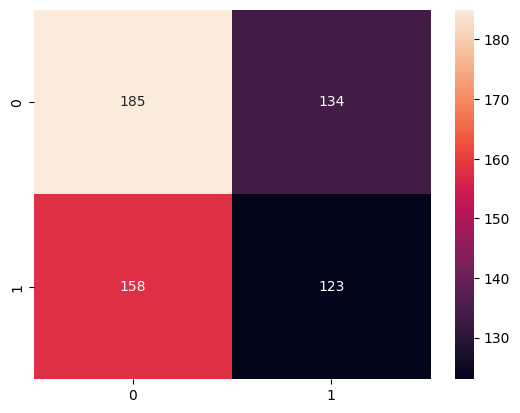

In [13]:
cmDD_train = confusion_matrix(yDD_test, pred)
sns.heatmap(cmDD_train, annot=True, fmt='d')
plt.show()

In [14]:
cmDD_train

array([[185, 134],
       [158, 123]], dtype=int64)

<Axes: >

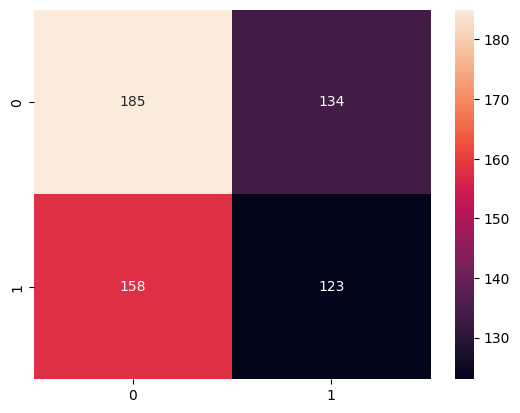

In [15]:
cmDD = confusion_matrix(yDD_test, pred)
sns.heatmap(cmDD, annot=True, fmt='d')

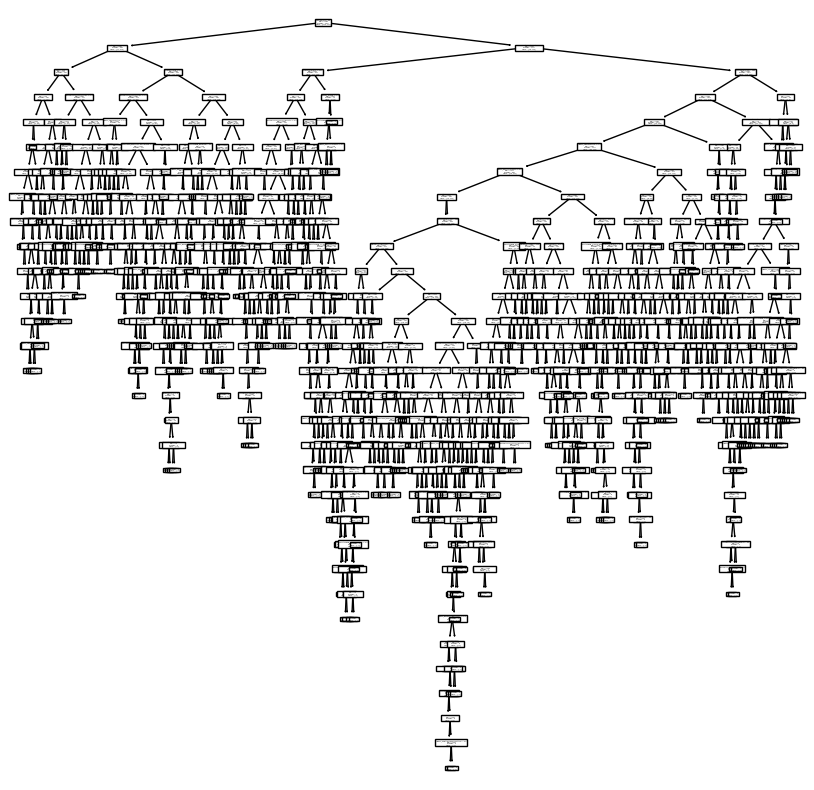

In [16]:
plt.figure(figsize=(10, 10))
plot_tree(dd, feature_names=list(XDD))
plt.show()

In [87]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [89]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [90]:
Xboot = train_data
yboot = train_labels

In [91]:
data = Xboot
data = data.values.flatten()

def bootstrap(data, num_samples, sample_size, statistic):
    
    statistics = np.empty(num_samples)
    
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        statistics[i] = statistic(sample)
    return statistics
    
bootstrap(data, num_samples=1000, sample_size=5, statistic=np.mean)

array([6.0000e-01, 3.8000e+00, 4.6000e+00, 8.0000e-01, 6.0000e-01,
       6.0000e-01, 1.6000e+00, 1.0200e+01, 3.4000e+00, 6.0000e-01,
       5.5640e+02, 4.0000e-01, 4.0000e-01, 1.9852e+03, 9.2000e+00,
       1.2000e+00, 6.0000e-01, 1.2000e+00, 1.2000e+00, 3.6000e+00,
       5.6000e+00, 0.0000e+00, 7.0000e+00, 2.8000e+00, 2.6292e+03,
       1.2000e+00, 1.0000e+00, 8.0000e-01, 1.4000e+00, 6.0000e-01,
       6.2000e+00, 5.5500e+02, 6.0000e-01, 1.2000e+00, 1.0000e+00,
       1.8000e+00, 4.0000e-01, 3.0000e+00, 1.0000e+00, 3.2000e+00,
       0.0000e+00, 2.0000e-01, 8.0000e-01, 2.1972e+03, 8.0000e-01,
       1.8000e+00, 1.8000e+00, 1.6000e+00, 1.2000e+00, 6.8000e+00,
       1.2000e+00, 8.0000e-01, 1.6000e+00, 3.8316e+03, 2.6000e+00,
       2.2000e+00, 1.8000e+00, 4.0000e-01, 2.0000e+00, 1.2000e+00,
       2.6000e+00, 5.4000e+00, 4.4000e+00, 9.6000e+00, 2.2000e+00,
       1.6000e+00, 2.8000e+00, 6.0000e+00, 4.0000e-01, 2.0000e-01,
       4.0000e-01, 1.2000e+00, 1.2000e+01, 4.6400e+02, 9.0000e

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [93]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [94]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [95]:
Xbag = train_data
ybag = train_labels

In [96]:
Xbag_train, Xbag_test, ybag_train, ybag_test = train_test_split(Xbag, ybag, test_size=0.2, stratify=ybag, random_state=42)

In [97]:
Xbag_train, ybag_train = make_classification(n_samples=100, n_features=46, n_informative=46, n_redundant=0, random_state=0, shuffle=True)

In [98]:
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
clf1.fit(Xbag_train, ybag_train)

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [99]:
pred_bag = clf1.predict(Xbag_test)
pred_bag

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [100]:
BAGMetrics1 = calculate_metrics(ybag_test.values, pred_bag)
BAGMetrics = print_results(calculate_metrics(ybag_test.values, pred_bag), 'Bagging')
BAGMetrics

Results for Bagging
----
  Accuracy:  0.5316666666666666
  Precision: 0.2658333333333333
  Recall:    0.5
  F1 score:  0.3471164309031556
  Mislabeled 168600 out of 600




C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
print(clf.predict([[45, 23, 2, 2, 3, 3, 4, 2344, 2, 2, 3, 2, 24, 1, 2, 10, 5, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]]))

[0]


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [103]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [104]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [105]:
Xrf = train_data
yrf = train_labels

In [106]:
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, test_size=0.2, stratify=yrf, random_state=42)

In [107]:
Xrf_train, yrf_train = make_classification(n_samples=1000, n_features=46, n_informative=46, n_redundant=0, random_state=None, shuffle=True)

# n_samples - liczba próbek
# n_features - liczba cech
# n_informative - liczba informacyjnych cech
# n_redundant - liczba zbędnnych cech
# random_state - losowość jest kontrolowana przez systemowy generator liczb losowych
# shuffle - parametr, który określa czy dane treningowe powinny być tasowane przed podziałem na drzewa decyzyjne


clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(Xrf_train, yrf_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [108]:
pred_rf = clf2.predict(Xrf_test)
pred_rf

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [109]:
RFMetrics1 = calculate_metrics(yrf_test.values, pred_rf)
RFMetrics = print_results(calculate_metrics(yrf_test.values, pred_rf), 'Random Forest')
RFMetrics

Results for Random Forest
----
  Accuracy:  0.5266666666666666
  Precision: 0.5181984812778214
  Recall:    0.516281975479423
  F1 score:  0.5076226031276367
  Mislabeled 176238 out of 600




In [110]:
print (clf1.predict([[45, 23, 2, 2, 3, 3, 4, 2344, 2, 2, 3, 2, 24, 1, 2, 10, 5, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]]))

[0]


In [213]:
from sklearn.ensemble import GradientBoostingClassifier

In [214]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [215]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [216]:
Xboo = train_data
yboo = train_labels

In [217]:
Xboo_train, Xboo_test, yboo_train, yboo_test = train_test_split(Xboo, yboo, test_size=0.2, stratify=yboo, random_state=42)

In [218]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [219]:
gb_clf.fit(Xboo_train, yboo_train)

C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [220]:
pred_boo = gb_clf.predict(Xboo_test)
pred_boo

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [223]:
BooMetrics1 = calculate_metrics(yboo_test.values, pred_boo)
BooMetrics = print_results(calculate_metrics(yboo_test.values, pred_boo), 'Boosting')
BooMetrics

Results for Boosting
----
  Accuracy:  0.5433333333333333
  Precision: 0.5383757017819158
  Recall:    0.5368310668347482
  F1 score:  0.5346414701253411
  Mislabeled 177606 out of 600




In [222]:
print (gb_clf.predict([[45, 23, 2, 2, 3, 3, 4, 2344, 2, 2, 3, 2, 24, 1, 2, 10, 5, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]]))

[0]


C:\Users\Kamil - IT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [121]:
from keras.models import Sequential
from keras.layers import Dense

In [122]:
model = Sequential()
model.add(Dense(12, input_dim=46, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [123]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
ATTMod = pd.read_csv('Dane/ATTMod.csv')
ATTMod.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,30,1,1,4,2,2,4,5126,1,12,...,0,0,0,0,0,0,1,0,0,1
1,38,2,2,4,2,3,3,7756,3,19,...,1,0,0,0,0,0,1,0,0,1
2,26,6,3,3,2,1,2,2368,1,19,...,0,0,1,0,0,0,1,0,1,0
3,28,8,2,4,3,1,4,3310,1,21,...,0,0,1,0,0,0,0,1,1,0
4,35,4,2,3,3,1,4,1951,1,12,...,0,0,0,0,0,1,0,0,1,0


In [125]:
train_data = ATTMod.drop('Attrition', axis=1)
train_labels = ATTMod[['Attrition']]

In [126]:
Xsn = train_data
ysn = train_labels

In [127]:
Xsn_train, Xsn_test, ysn_train, ysn_test = train_test_split(Xsn, ysn, test_size=0.2, stratify=ysn, random_state=42)

In [128]:
model.fit(Xsn_train, ysn_train, epochs=10, batch_size=10 )

Epoch 1/10
240/240 [==============================] - 2s 4ms/step - loss: 61.8419 - accuracy: 0.4885
Epoch 2/10
240/240 [==============================] - 1s 2ms/step - loss: 1.2331 - accuracy: 0.4856
Epoch 3/10
240/240 [==============================] - 1s 2ms/step - loss: 1.2170 - accuracy: 0.5040
Epoch 4/10
240/240 [==============================] - 1s 2ms/step - loss: 1.2928 - accuracy: 0.5136
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 1.3973 - accuracy: 0.5202
Epoch 6/10
240/240 [==============================] - 1s 2ms/step - loss: 1.3897 - accuracy: 0.5186
Epoch 7/10
240/240 [==============================] - 1s 2ms/step - loss: 1.3822 - accuracy: 0.4965
Epoch 8/10
240/240 [==============================] - 1s 2ms/step - loss: 1.3245 - accuracy: 0.5040
Epoch 9/10
240/240 [==============================] - 1s 2ms/step - loss: 1.0421 - accuracy: 0.4931
Epoch 10/10
240/240 [==============================] - 1s 2ms/step - loss: 1.2433 - accuracy: 0.514

In [129]:
pred_sn = model.predict(Xsn_test)
pred_sn


19/19 [==============================] - 0s 2ms/step


array([[0.39567527],
       [0.37635925],
       [0.3462384 ],
       [0.15722646],
       [0.2734723 ],
       [0.26117876],
       [0.13469112],
       [0.32651412],
       [0.08664454],
       [0.31787714],
       [0.19291049],
       [0.3033458 ],
       [0.42918387],
       [0.26117876],
       [0.33730695],
       [0.325247  ],
       [0.08963913],
       [0.2227644 ],
       [0.32836226],
       [0.3067812 ],
       [0.35162523],
       [0.33741954],
       [0.12296408],
       [0.41957113],
       [0.26193324],
       [0.37635925],
       [0.4176512 ],
       [0.41844565],
       [0.5485802 ],
       [0.2754778 ],
       [0.0645837 ],
       [0.20837098],
       [0.10007918],
       [0.37595463],
       [0.312358  ],
       [0.5838795 ],
       [0.37591526],
       [0.36755872],
       [0.47750974],
       [0.28910297],
       [0.5241676 ],
       [0.3497629 ],
       [0.22598283],
       [0.13717146],
       [0.40020835],
       [0.10475222],
       [0.37143698],
       [0.062

In [132]:
from sklearn.metrics import mean_squared_error

In [134]:
# W przypadku oceny jakości sieci neuronowej gęsto połączonej warto zwrócić uwage na miarę straty, która określa jak dobrze 
# model radzi sobie z przewidywaniem wyników dla danych treningowych i testowych. Im mniejsza jej wartość, tym lepszy model.

def mean_squared_error(act, pred_sn):
    diff = pred_sn - act
    differences_squared = diff ** 2
    mean_diff = differences_squared.mean()
    return mean_diff

act = ysn_test
pred_sn 
print(mean_squared_error(act, pred_sn))

Attrition    0.287861
dtype: float64


In [227]:
data1 = LogMetrics1
data1 = data1[:-2]
data1

(0.5506666666666666, 0.545, 0.5401645138487243, 0.5322034651183881)

In [228]:
data2 = GNBMetricsBayes1
data2 = data2[:-2]
data2

(0.5533333333333333,
 0.5484994862467669,
 0.5458115329265164,
 0.5425788539438351)

In [229]:
data3 = MNBMetricsBayes1
data3 = data3[:-2]
data3

(0.5616666666666666, 0.5573446595049927, 0.5540724461450931, 0.550876473953397)

In [230]:
data4 = KNNMetrics1
data4 = data4[:-2]
data4

(0.515, 0.5135517348893145, 0.5135766797933935, 0.5135284234810301)

In [231]:
data5 = SVMMetrics1
data5 = data5[:-2]
data5

(0.5716666666666667,
 0.5765527950310559,
 0.5549983824005177,
 0.5298192761900116)

In [232]:
data6 = DDMetrics1
data6 = data6[:-2]
data6

(0.818523153942428, 0.8251271977611454, 0.8133453952611724, 0.8152718981448263)

In [233]:
data7 = BAGMetrics1
data7 = data7[:-2]
data7

(0.5316666666666666, 0.2658333333333333, 0.5, 0.3471164309031556)

In [234]:
data8 = RFMetrics1
data8 = data8[:-2]
data8

(0.5266666666666666, 0.5181984812778214, 0.516281975479423, 0.5076226031276367)

In [235]:
data9 = BooMetrics1
data9 = data9[:-2]
data9

(0.5433333333333333,
 0.5383757017819158,
 0.5368310668347482,
 0.5346414701253411)

In [238]:
data = {data1, data2, data3, data4, data5, data6, data7, data8, data9}
df = pd.DataFrame(data)
df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
df.index = ['Drzewo decyzyjne', 'SVM', 'Bayes-Multinomial', 'Random Forest', 'KNN', 'Bagging', 'Bayes-Gaussian', 'Regresja logistyczna', 'Boosting']
df

,Accuracy,Precision,Recall,F1-Score
Drzewo decyzyjne,0.818523,0.825127,0.813345,0.815272
SVM,0.571667,0.576553,0.554998,0.529819
Bayes-Multinomial,0.561667,0.557345,0.554072,0.550876
Random Forest,0.526667,0.518198,0.516282,0.507623
KNN,0.515000,0.513552,0.513577,0.513528
Bagging,0.531667,0.265833,0.500000,0.347116
Bayes-Gaussian,0.553333,0.548499,0.545812,0.542579
Regresja logistyczna,0.550667,0.545000,0.540165,0.532203
Boosting,0.543333,0.538376,0.536831,0.534641


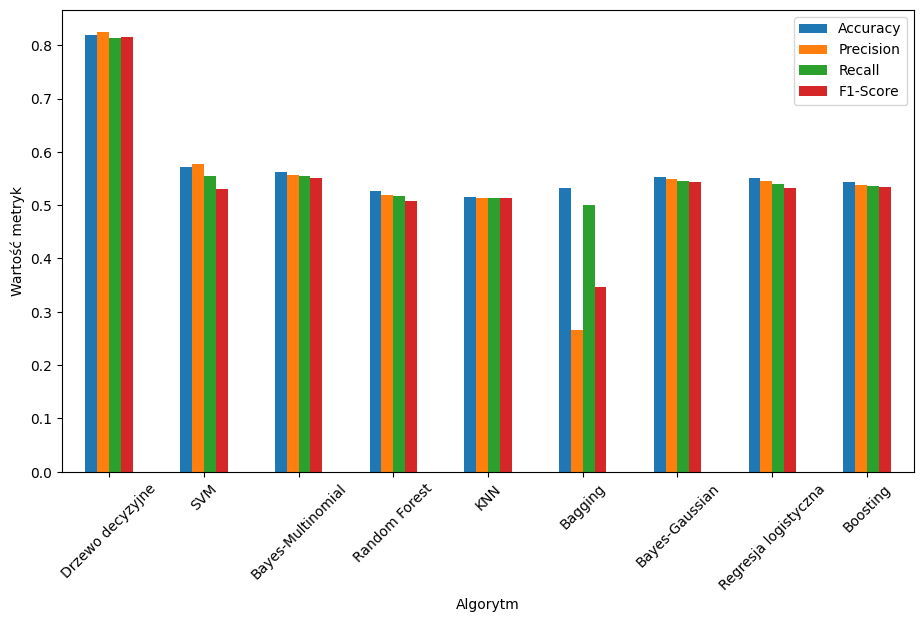

In [244]:
ax = df.plot(kind='bar', figsize=(11, 6))
ax.set_xlabel('Algorytm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Wartość metryk')
plt.show()